## Задача 3.2. Эффект наложения при прореживании сигнала

| Варианты: | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12 |
|:---------:|----|----|----|----|----|----|----|----|----|----|----|----|
| $K_1$     | 35 | 10 | 20 | 25 | 15 | 40 | 20 | 15 | 40 | 35 | 10 | 25 |
| $K_2$     | 70 | 60 | 65 | 80 | 75 | 90 | 85 | 60 | 95 | 80 | 70 | 75 |


Выполнить прореживание (downsampling) сигнала камертона (основная частота сигнала 440 Гц, частота дискретизации 44100 Гц) без предварительной фильтрации, оставляя в одном случае каждый $K_1$-ый, а в другом каждый $K_2$-ый отсчет сигнала. В чем принципиальное отличие между спектрами получившихся сигналов и какими эффектами оно обусловлено? 

In [3]:
from my_lib import *

def DTFT_abs(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 

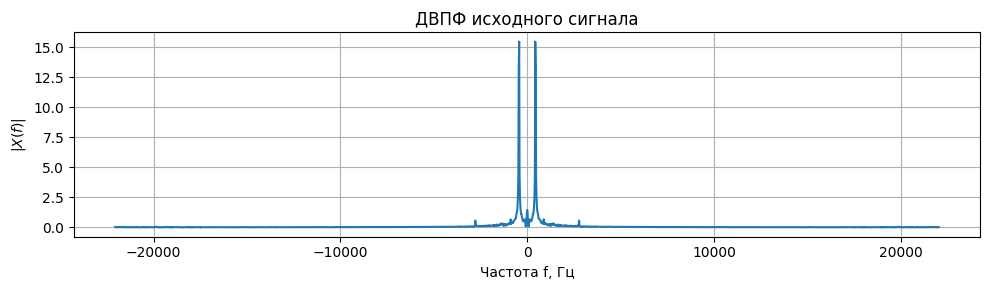

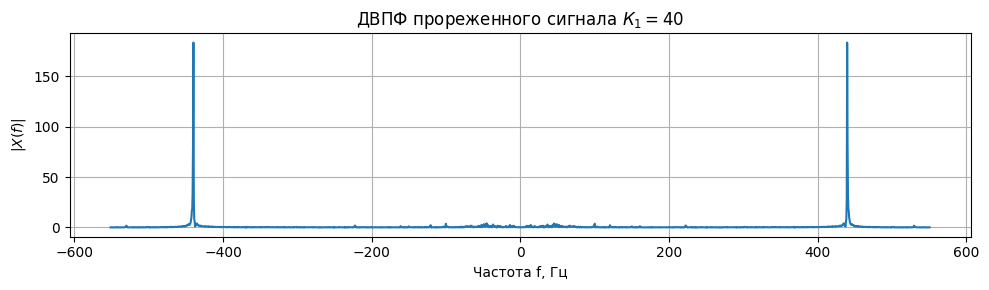

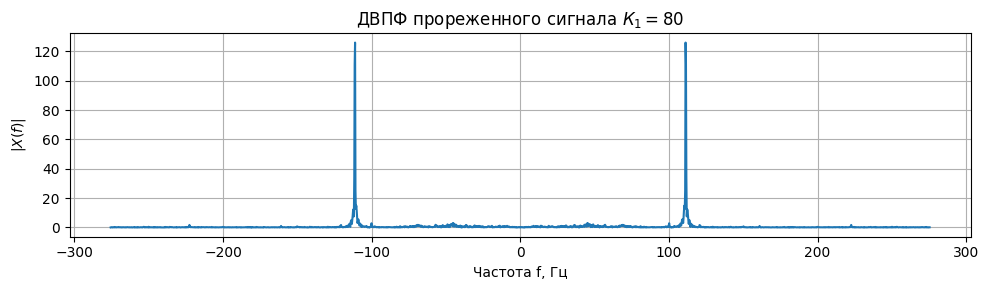

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy import signal

fs, x=scipy.io.wavfile.read('./tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[10, 3], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=40
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end 
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=80
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end
    
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 